## 라이브러리 import

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sb
import scipy.stats       as sp
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
FeatureData = pd.read_csv('./ProcessedData/FeatureData', sep=',', header=None)
FeatureData.shape

(270, 360)

특징데이터 정상/고장 분리

In [3]:
NoOfData = int(FeatureData.shape[1]/2)
Normal_FeatureData   = FeatureData.iloc[:,:NoOfData]
Abnormal_FeatureData = FeatureData.iloc[:,NoOfData:]

print(Normal_FeatureData.shape)
print(Abnormal_FeatureData.shape)

(270, 180)
(270, 180)


## P-value 계산

In [4]:
NoOfFeature = FeatureData.shape[0] # 추출된 Feature 갯수

P_value = np.zeros((NoOfFeature , 2))

# 특징값 각각 T-검정 수행
for i in np.arange(NoOfFeature):
    
    T_test       = np.array(sp.ttest_ind(Normal_FeatureData.iloc[i,:] , Abnormal_FeatureData.iloc[i,:]))
    P_value[i,0] = i          # Feature Index
    P_value[i,1] = T_test[1]  # P값 (P-value)
    
P_value      = pd.DataFrame(P_value)
P_value

,0,1
0,0.0,1.014879e-11
1,1.0,8.509037e-11
2,2.0,2.246947e-08
3,3.0,1.340717e-15
4,4.0,5.902344e-12
...,...,...
265,265.0,2.327503e-02
266,266.0,8.275884e-01
267,267.0,3.678342e-01
268,268.0,9.596972e-12


In [5]:
P_value_Rank = P_value.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬

P_value_Rank

,0,1
144,144.0,6.258777e-141
143,143.0,5.632614e-138
124,124.0,2.431809e-91
123,123.0,5.171276e-91
134,134.0,9.831666e-90
...,...,...
228,228.0,9.695842e-01
209,209.0,9.775134e-01
245,245.0,9.838356e-01
59,59.0,9.898458e-01


In [6]:
# 특징값 저장
path1 = './ProcessedData/P_value'        # path = '파일 경로/저장할 파일 이름'
path2 = './ProcessedData/P_value_Rank'   # path = '파일 경로/저장할 파일 이름'
P_value.to_csv(path1, sep=',', header=None, index=None)
P_value_Rank.to_csv(path2, sep=',', header=None, index=None)

## PDF(Probabilistic Density Function) 그래프 확인 (정상 vs 고장)

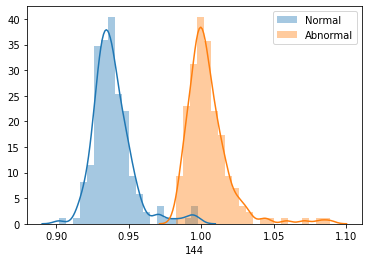

In [7]:
# P-value 낮은 순위
FeatureRank = 1

# PDF 그래프
sb.distplot(Normal_FeatureData.iloc[int(P_value_Rank.iloc[FeatureRank-1,0])  ,:], label = 'Normal')
sb.distplot(Abnormal_FeatureData.iloc[int(P_value_Rank.iloc[FeatureRank-1,0]),:], label = 'Abnormal')
plt.legend(loc='upper right')
plt.show()

## P-value 기반 구분성(유의수준↓) 상위 특징값 선택

In [8]:
Rank = 30

Normal   = np.zeros((Rank,NoOfData))
Abnormal = np.zeros((Rank,NoOfData))

for i in range(Rank):
    
    index         = int(P_value_Rank.iloc[i,0])
    Normal[i,:]   = Normal_FeatureData.iloc[index,:].values
    Abnormal[i,:] = Abnormal_FeatureData.iloc[index,:].values

# 정상, 고장 특징값 합치기    
FeatureSelected = pd.DataFrame(np.concatenate([Normal, Abnormal] , axis=1))

print("Selected Feature Data Size :", FeatureSelected.shape)
print("= 데이터 360개(정상/고장 각 180개씩)가 각각 30개의 최종 선택된 특징값으로 구성됨")

Selected Feature Data Size : (30, 360)
= 데이터 360개(정상/고장 각 180개씩)가 각각 30개의 최종 선택된 특징값으로 구성됨


최종 선택된 특징 데이터 저장 (.csv 파일)

In [9]:
path = './ProcessedData//FeatureSelected'   # path = '파일 경로//저장할 파일 이름'
FeatureSelected.to_csv(path, sep=',', header=None, index=None)

## [실습 과제 2]

## 2. P-value 기반 하위(값이 큰 순서) 15개를 선택한 특징데이터 추출 
#### >>>>>> 저장된 특징 데이터 파일 제출
#### >>>>>> 데이터 이름 : ST(수강생 번호)_HW2_2  (예시 : 'ST000_HW2_2'  //  'ST00_HW2_2'  //  'ST0_HW2_2')
#### >>>>>> 데이터 이름 중 'ST' , 'HW' 등 영어는 모두 대문자

### ****** 필독 !! 실습과제 주의사항 ******

- 각자의 "수강생 번호" 확인 (아이캠퍼스 공지) 
- 제출하는 실습과제 파일에 "수강생 번호"를 기준으로 작성 (이름, 학번 등 작성X)
- 각 실습과제에 대한 구체적인 파일 이름은 매번 개별 안내 
  (수강생 번호 123번 학생 과제파일 예시 : 'ST123_HW2_1.csv' )
- 과제 파일이름 양식 지키지 않을 시 감점!